In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
file = 'Real estate valuation data set.xlsx'
df = pd.read_excel(file)
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [65]:
print(df.shape)

(414, 8)


In [66]:
names = list(df.columns)
print(names)

['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


<AxesSubplot:>

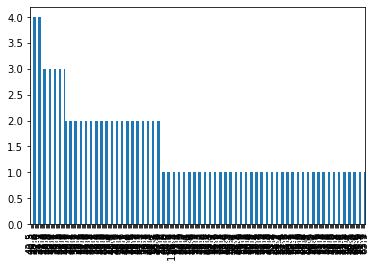

In [67]:
g = df[names[-1]].value_counts()
g.plot.bar()

In [68]:
types = df.dtypes
print(types)

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


In [69]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
    if types[i] == 'object':
        df[names[i]] = le.fit_transform(df[names[i]])
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [70]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [71]:
data = df.values
X = data[:,3:6]
y = data[:,:-1]

In [72]:
# Preprocessing normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.00951267 1.         0.61694135]


In [73]:
X_scaled.shape
y.shape 

(414, 7)

In [74]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [82]:
# Build model using knn regression
X = [[2], [3], [4]]
y = [1,2,3]

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y)


KNeighborsRegressor(n_neighbors=3)

In [86]:
print(neigh.predict([[1.5]]))

[2.]


In [88]:
from sklearn.neighbors import KNeighborsClassifier
kNN =  KNeighborsClassifier(n_neighbors=3)
kNN.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [89]:
print(kNN.predict([[1.5]]))

[1]


In [84]:
error = 0
for i in range(len(X)):
    if kNN.predict([X[i]]) != y[i]:
        error += 1
print(error)

2


In [85]:
# Root mean square deviation
from sklearn.metrics import mean_squared_error
y_true =    [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred, squared=False)

0.6123724356957945